# Feature engineering & basic visualisation

### Importing electricity price for all years (2013-2020)

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
!pwd

/home/dsc/CarpetaCompartida/TFM


In [3]:
path_2013 = "/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Definitivo_2013/2013/PFMDIASM_TOD_2013"
path_2014 = "/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Definitivo_2014/2014/PFMDIASM_TOD_2014"
path_2015 = "/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Definitivo_2015/2015/PFMDIASM_TOD_2015"
path_2016 = "/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Definitivo_2016/2016/PFMDIASM_TOD_2016"
path_2017 = "/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Definitivo_2017/2017/PFMDIASM_TOD_2017"
path_2018 = "/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Definitivos_2018/2018/PFMDIASM_TOD_2018"
path_2019 = "/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Definitivos_2019/2019/PFMDIASM_TOD_2019"
path_2020 = "/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Definitivos_2020/2020/PFMDIASM_TOD_2020"

In [4]:
import glob

In [5]:
#Using glob.iglob() it returns an iterator that I can easily convert into a pandas Dataframe

data2013_import = glob.iglob(path_2013 + "*xls")
dataframes13 = (pd.read_excel(excel, dtype= str,parse_dates= True, engine= None, header = 3) for excel in data2013_import)
data2013  = pd.concat(dataframes13, ignore_index= True)

data2014_import = glob.iglob(path_2014 + "*xls")
dataframes14 = (pd.read_excel(excel, dtype= str,parse_dates= True, engine= None, header = 3) for excel in data2014_import)
data2014  = pd.concat(dataframes14, ignore_index= True)

data2015_import = glob.iglob(path_2015 + "*xls")
dataframes15 = (pd.read_excel(excel, dtype= str,parse_dates= True, engine= None, header = 3) for excel in data2015_import)
data2015  = pd.concat(dataframes15, ignore_index= True)

data2016_import = glob.iglob(path_2016 + "*xls")
dataframes16 = (pd.read_excel(excel, dtype= str,parse_dates= True, engine= None, header = 3) for excel in data2016_import)
data2016  = pd.concat(dataframes16, ignore_index= True)

data2017_import = glob.iglob(path_2017 + "*xls")
dataframes17 = (pd.read_excel(excel, dtype= str,parse_dates= True, engine= None, header = 3) for excel in data2017_import)
data2017  = pd.concat(dataframes17, ignore_index= True)

data2018_import = glob.iglob(path_2018 + "*xls")
dataframes18 = (pd.read_excel(excel, dtype= str,parse_dates= True, engine= None, header = 3) for excel in data2018_import)
data2018  = pd.concat(dataframes18, ignore_index= True)

data2019_import = glob.iglob(path_2019 + "*xls")
dataframes19 = (pd.read_excel(excel, dtype= str,parse_dates= True, engine= None, header = 3) for excel in data2019_import)
data2019  = pd.concat(dataframes19, ignore_index= True)

data2020_import = glob.iglob(path_2020 + "*xls")
dataframes20 = (pd.read_excel(excel, dtype= str,parse_dates= True, engine= None, header = 3) for excel in data2020_import)
data2020  = pd.concat(dataframes20, ignore_index= True)



In [6]:
electricity_prices = data2013.append([data2014, data2015, data2016, data2017, data2018, data2019, data2020],
                                    ignore_index=True)
electricity_prices

,Periodo,Energía\n final \nMWh,Mercado \ndiario \n€/MWh,Mercado \nintradiario \n€/MWh,Restricciones\n€/MWh,Procesos \nOS \n€/MWh,Garantía potencia \nPagos capacidad\n€/MWh,Total\n€/MWh,Coste\ns.interrrumpibilidad
0,01/06/13 Sábado,656315.602,33.02,-0.44,4.81,1.49,3.9,42.78,NaN
1,02/06/13 Domingo,649328.82,19.09,-0.39,6.53,2.35,3.74,31.32,NaN
2,03/06/13 Lunes,700500.79,38.51,-0.16,5.44,1.94,5.45,51.18,NaN
3,04/06/13 Martes,702582.423,47.12,0.01,3.16,1.25,5.42,56.96,NaN
4,05/06/13 Miércoles,701818.743,51.48,-0.16,2.6,0.97,5.45,60.35,NaN
...,...,...,...,...,...,...,...,...,...
2917,27/01/20 Lunes,822863.04,39.87,-0.03,1.15,0.21,3.23,44.46,0.03
2918,28/01/20 Martes,816667.2,39.02,-0.02,1.36,0.24,3.2,43.83,0.03
2919,29/01/20 Miércoles,818153.969,40.24,-0.02,1.38,0.3,3.12,45.06,0.03
2920,30/01/20 Jueves,793218.71,38.48,0,1.11,0.33,3.15,43.1,0.03


In [7]:
type(electricity_prices)

pandas.core.frame.DataFrame

In [8]:
electricity_prices[["Date", "Day"]] = electricity_prices.Periodo.str.split(expand= True)

In [9]:
electricity_prices.head()

,Periodo,Energía\n final \nMWh,Mercado \ndiario \n€/MWh,Mercado \nintradiario \n€/MWh,Restricciones\n€/MWh,Procesos \nOS \n€/MWh,Garantía potencia \nPagos capacidad\n€/MWh,Total\n€/MWh,Coste\ns.interrrumpibilidad,Date,Day
0,01/06/13 Sábado,656315.602,33.02,-0.44,4.81,1.49,3.9,42.78,NaN,01/06/13,Sábado
1,02/06/13 Domingo,649328.82,19.09,-0.39,6.53,2.35,3.74,31.32,NaN,02/06/13,Domingo
2,03/06/13 Lunes,700500.79,38.51,-0.16,5.44,1.94,5.45,51.18,NaN,03/06/13,Lunes
3,04/06/13 Martes,702582.423,47.12,0.01,3.16,1.25,5.42,56.96,NaN,04/06/13,Martes
4,05/06/13 Miércoles,701818.743,51.48,-0.16,2.6,0.97,5.45,60.35,NaN,05/06/13,Miércoles


In [10]:
electricity_prices["Date"] = pd.to_datetime(electricity_prices["Date"], dayfirst=True)
electricity_prices.head()

,Periodo,Energía\n final \nMWh,Mercado \ndiario \n€/MWh,Mercado \nintradiario \n€/MWh,Restricciones\n€/MWh,Procesos \nOS \n€/MWh,Garantía potencia \nPagos capacidad\n€/MWh,Total\n€/MWh,Coste\ns.interrrumpibilidad,Date,Day
0,01/06/13 Sábado,656315.602,33.02,-0.44,4.81,1.49,3.9,42.78,NaN,2013-06-01,Sábado
1,02/06/13 Domingo,649328.82,19.09,-0.39,6.53,2.35,3.74,31.32,NaN,2013-06-02,Domingo
2,03/06/13 Lunes,700500.79,38.51,-0.16,5.44,1.94,5.45,51.18,NaN,2013-06-03,Lunes
3,04/06/13 Martes,702582.423,47.12,0.01,3.16,1.25,5.42,56.96,NaN,2013-06-04,Martes
4,05/06/13 Miércoles,701818.743,51.48,-0.16,2.6,0.97,5.45,60.35,NaN,2013-06-05,Miércoles


### Importing the Brent crude oil future prices

In [11]:
brent_prices = pd.read_csv("/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Datos_históricos_Futuros_petróleo_Brent.csv")
brent_prices.head()

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,12.11.2021,"81,99","82,85","82,85","81,26",-,"-1,06%"
1,11.11.2021,"82,87","82,85","83,44","81,66","336,14K","0,28%"
2,10.11.2021,"82,64","84,99","85,50","82,08","366,31K","-2,52%"
3,09.11.2021,"84,78","83,47","85,30","83,16","346,57K","1,62%"
4,08.11.2021,"83,43","82,58","84,00","82,53","269,60K","0,83%"


In [12]:
brent_prices["Fecha"] = pd.to_datetime(brent_prices["Fecha"], dayfirst=True)

In [13]:
#Column "Vol." is the number of contracts that were sold that day
brent_prices

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,2021-11-12,"81,99","82,85","82,85","81,26",-,"-1,06%"
1,2021-11-11,"82,87","82,85","83,44","81,66","336,14K","0,28%"
2,2021-11-10,"82,64","84,99","85,50","82,08","366,31K","-2,52%"
3,2021-11-09,"84,78","83,47","85,30","83,16","346,57K","1,62%"
4,2021-11-08,"83,43","82,58","84,00","82,53","269,60K","0,83%"
...,...,...,...,...,...,...,...
2285,2013-01-08,"111,94","111,42","112,47","111,12","194,00K","0,48%"
2286,2013-01-07,"111,40","111,42","111,69","110,54","203,50K","0,08%"
2287,2013-01-04,"111,31","111,72","111,78","110,38","191,33K","-0,74%"
2288,2013-01-03,"112,14","112,20","112,42","111,63","190,29K","-0,29%"


In [14]:
brent_prices.dtypes

Fecha       datetime64[ns]
Último              object
Apertura            object
Máximo              object
Mínimo              object
Vol.                object
% var.              object
dtype: object

In [15]:
brent_prices.rename(columns={"Fecha":"Date"}, inplace= True)

In [16]:
electricity_brent = pd.merge(electricity_prices, brent_prices, on= "Date", sort=False, indicator= True)
electricity_brent.head()

,Periodo,Energía\n final \nMWh,Mercado \ndiario \n€/MWh,Mercado \nintradiario \n€/MWh,Restricciones\n€/MWh,Procesos \nOS \n€/MWh,Garantía potencia \nPagos capacidad\n€/MWh,Total\n€/MWh,Coste\ns.interrrumpibilidad,Date,Day,Último,Apertura,Máximo,Mínimo,Vol.,% var.,_merge
0,03/06/13 Lunes,700500.79,38.51,-0.16,5.44,1.94,5.45,51.18,NaN,2013-06-03,Lunes,"102,06","100,15","102,48","99,66","255,71K","1,66%",both
1,04/06/13 Martes,702582.423,47.12,0.01,3.16,1.25,5.42,56.96,NaN,2013-06-04,Martes,"103,24","102,02","103,58","101,47","300,89K","1,16%",both
2,05/06/13 Miércoles,701818.743,51.48,-0.16,2.6,0.97,5.45,60.35,NaN,2013-06-05,Miércoles,"103,04","103,48","104,07","102,85","202,95K","-0,19%",both
3,06/06/13 Jueves,700746.514,49.47,-0.32,2.35,0.67,5.44,57.6,NaN,2013-06-06,Jueves,"103,61","102,94","103,95","102,81","173,41K","0,55%",both
4,07/06/13 Viernes,688082.805,49.33,-0.16,2.24,0.99,5.42,57.82,NaN,2013-06-07,Viernes,"104,56","103,65","105,01","102,89","234,18K","0,92%",both


In [17]:
brent_prices.to_csv("historic_brent_prices.csv", sep= ";", index = True)

In [18]:
#In the brent_prices DataFrame, we're missing Saturday and Sunday prices (and bank holidays) 
#This is because the Brent Crude Futures Markets does not operate during weekends.
#So Friday prices should also be Saturday and Sunday prices.

electricity_brent["Day"].unique()

array(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes'], dtype=object)

In [19]:
date_day = electricity_prices[["Date", "Day"]]
date_day

,Date,Day
0,2013-06-01,Sábado
1,2013-06-02,Domingo
2,2013-06-03,Lunes
3,2013-06-04,Martes
4,2013-06-05,Miércoles
...,...,...
2917,2020-01-27,Lunes
2918,2020-01-28,Martes
2919,2020-01-29,Miércoles
2920,2020-01-30,Jueves


In [20]:
brent_prices_allweek = pd.merge(date_day, brent_prices, on= "Date", indicator = True, how= "left")
brent_prices_allweek

,Date,Day,Último,Apertura,Máximo,Mínimo,Vol.,% var.,_merge
0,2013-06-01,Sábado,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2013-06-02,Domingo,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,2013-06-03,Lunes,"102,06","100,15","102,48","99,66","255,71K","1,66%",both
3,2013-06-04,Martes,"103,24","102,02","103,58","101,47","300,89K","1,16%",both
4,2013-06-05,Miércoles,"103,04","103,48","104,07","102,85","202,95K","-0,19%",both
...,...,...,...,...,...,...,...,...,...
2917,2020-01-27,Lunes,"59,32","60,23","60,49","58,50","259,77K","-2,26%",both
2918,2020-01-28,Martes,"59,51","59,03","60,12","58,50","248,95K","0,32%",both
2919,2020-01-29,Miércoles,"59,81","59,86","60,62","59,26","142,68K","0,50%",both
2920,2020-01-30,Jueves,"58,29","59,60","59,65","57,71","104,27K","-2,54%",both


In [21]:
#There were 856 Saturday, Sunday and bank holidays between 2013 and 2020 in Spain
np.count_nonzero(brent_prices_allweek["_merge"] != "both")

856

In [22]:
#I'm going to use Friday's price for the weekend (as this is the latest price) and the previous day's price for the bank holidays
brent_prices_allweek = brent_prices_allweek.fillna(method= "ffill")
brent_prices_allweek

,Date,Day,Último,Apertura,Máximo,Mínimo,Vol.,% var.,_merge
0,2013-06-01,Sábado,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2013-06-02,Domingo,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,2013-06-03,Lunes,"102,06","100,15","102,48","99,66","255,71K","1,66%",both
3,2013-06-04,Martes,"103,24","102,02","103,58","101,47","300,89K","1,16%",both
4,2013-06-05,Miércoles,"103,04","103,48","104,07","102,85","202,95K","-0,19%",both
...,...,...,...,...,...,...,...,...,...
2917,2020-01-27,Lunes,"59,32","60,23","60,49","58,50","259,77K","-2,26%",both
2918,2020-01-28,Martes,"59,51","59,03","60,12","58,50","248,95K","0,32%",both
2919,2020-01-29,Miércoles,"59,81","59,86","60,62","59,26","142,68K","0,50%",both
2920,2020-01-30,Jueves,"58,29","59,60","59,65","57,71","104,27K","-2,54%",both


In [23]:
#The 1st of January of 2013 still has NaN values, but I don't have historical data before that.
#Therefore, I'll drop that row
brent_prices_allweek.isna().sum()

Date        0
Day         0
Último      2
Apertura    2
Máximo      2
Mínimo      2
Vol.        2
% var.      2
_merge      0
dtype: int64

In [24]:
brent_prices_allweek = brent_prices_allweek.dropna()
brent_prices_allweek

,Date,Day,Último,Apertura,Máximo,Mínimo,Vol.,% var.,_merge
2,2013-06-03,Lunes,"102,06","100,15","102,48","99,66","255,71K","1,66%",both
3,2013-06-04,Martes,"103,24","102,02","103,58","101,47","300,89K","1,16%",both
4,2013-06-05,Miércoles,"103,04","103,48","104,07","102,85","202,95K","-0,19%",both
5,2013-06-06,Jueves,"103,61","102,94","103,95","102,81","173,41K","0,55%",both
6,2013-06-07,Viernes,"104,56","103,65","105,01","102,89","234,18K","0,92%",both
...,...,...,...,...,...,...,...,...,...
2917,2020-01-27,Lunes,"59,32","60,23","60,49","58,50","259,77K","-2,26%",both
2918,2020-01-28,Martes,"59,51","59,03","60,12","58,50","248,95K","0,32%",both
2919,2020-01-29,Miércoles,"59,81","59,86","60,62","59,26","142,68K","0,50%",both
2920,2020-01-30,Jueves,"58,29","59,60","59,65","57,71","104,27K","-2,54%",both


In [25]:
#Now that we have the Brent prices for all days of the week, let's merge both datasets again
electricity_brent = pd.merge(electricity_prices, brent_prices_allweek, on= "Date", sort=False)
electricity_brent

,Periodo,Energía\n final \nMWh,Mercado \ndiario \n€/MWh,Mercado \nintradiario \n€/MWh,Restricciones\n€/MWh,Procesos \nOS \n€/MWh,Garantía potencia \nPagos capacidad\n€/MWh,Total\n€/MWh,Coste\ns.interrrumpibilidad,Date,Day_x,Day_y,Último,Apertura,Máximo,Mínimo,Vol.,% var.,_merge
0,03/06/13 Lunes,700500.79,38.51,-0.16,5.44,1.94,5.45,51.18,NaN,2013-06-03,Lunes,Lunes,"102,06","100,15","102,48","99,66","255,71K","1,66%",both
1,04/06/13 Martes,702582.423,47.12,0.01,3.16,1.25,5.42,56.96,NaN,2013-06-04,Martes,Martes,"103,24","102,02","103,58","101,47","300,89K","1,16%",both
2,05/06/13 Miércoles,701818.743,51.48,-0.16,2.6,0.97,5.45,60.35,NaN,2013-06-05,Miércoles,Miércoles,"103,04","103,48","104,07","102,85","202,95K","-0,19%",both
3,06/06/13 Jueves,700746.514,49.47,-0.32,2.35,0.67,5.44,57.6,NaN,2013-06-06,Jueves,Jueves,"103,61","102,94","103,95","102,81","173,41K","0,55%",both
4,07/06/13 Viernes,688082.805,49.33,-0.16,2.24,0.99,5.42,57.82,NaN,2013-06-07,Viernes,Viernes,"104,56","103,65","105,01","102,89","234,18K","0,92%",both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,27/01/20 Lunes,822863.04,39.87,-0.03,1.15,0.21,3.23,44.46,0.03,2020-01-27,Lunes,Lunes,"59,32","60,23","60,49","58,50","259,77K","-2,26%",both
2916,28/01/20 Martes,816667.2,39.02,-0.02,1.36,0.24,3.2,43.83,0.03,2020-01-28,Martes,Martes,"59,51","59,03","60,12","58,50","248,95K","0,32%",both
2917,29/01/20 Miércoles,818153.969,40.24,-0.02,1.38,0.3,3.12,45.06,0.03,2020-01-29,Miércoles,Miércoles,"59,81","59,86","60,62","59,26","142,68K","0,50%",both
2918,30/01/20 Jueves,793218.71,38.48,0,1.11,0.33,3.15,43.1,0.03,2020-01-30,Jueves,Jueves,"58,29","59,60","59,65","57,71","104,27K","-2,54%",both


In [26]:
#Let's get rid of some columns we don't need
electricity_brent = electricity_brent.drop(columns= ["Day_y", "_merge", "% var."])
electricity_brent.rename(columns={"Day_x":"Day"}, inplace= True)

### Now, let's start looking at the weather data

The first file that we'll look at, contains a list of weather stations across Spain (with their specific code) that will allow us to choose the weather stations data that we will use

In [27]:
#The encoding = "latin1" is used so "special characters" like ñ are read well

listado_estaciones = pd.read_csv("/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Aemet2021-06-Por-Estaciones/ListadoEstaciones.csv", 
                                names =["Identificador_est", "Nombre_est", "Municipio", "Provincia", "Altura", "Longitud", "Latitud"],
                                         header= 0, dtype = str, engine= "python", sep=";", error_bad_lines= False,
                                encoding= "latin1")
listado_estaciones

,Identificador_est,Nombre_est,Municipio,Provincia,Altura,Longitud,Latitud
0,1387,A Coruña,"Coruña, A",A Coruña,58,432157N,082517W
1,1387E,A Coruña Aeropuerto,Culleredo,A Coruña,98,431825N,082219W
2,1390X,"Carballo, Depuradora",Carballo,A Coruña,98,431213N,084239W
3,1393,Cabo Vilan,Camariñas,A Coruña,50,430938N,091239W
4,1399,Vimianzo,Vimianzo,A Coruña,287,430327N,090249W
...,...,...,...,...,...,...,...
843,B640X,Petra,Petra,Illes Balears,95,393659N,030716E
844,9293X,"Alfaro, La Plana",Alfaro,La Rioja,371,421034N,014438W
845,9445L,"Formigal, Sarrios",Sallent de Gállego,Huesca,1800,424545N,002334W
846,9574B,"Caspe, Plana del Pilón",Caspe,Zaragoza,202,411433N,000407W


In [28]:
#Let's have a look at the stations in Madrid, for example
in_madrid = listado_estaciones["Provincia"] == "Madrid"
estaciones_madrid = listado_estaciones[in_madrid]
estaciones_madrid

,Identificador_est,Nombre_est,Municipio,Provincia,Altura,Longitud,Latitud
496,2462,Puerto de Navacerrada,Cercedilla,Madrid,1894,404735N,040038W
497,3100B,Aranjuez,Aranjuez,Madrid,540,400402N,033246W
498,3104Y,Rascafría,Rascafría,Madrid,1159,405323N,035318W
499,3110C,Buitrago del Lozoya,Buitrago del Lozoya,Madrid,1026,410025N,033649W
500,3111D,Somosierra,Somosierra,Madrid,1450,410808N,033449W
501,3125Y,San Sebastián de Los Reyes,San Sebastián de los Reyes,Madrid,671,403412N,033806W
502,3126Y,"Madrid, El Goloso",Madrid,Madrid,740,403341N,034243W
503,3129,Madrid Aeropuerto,Madrid,Madrid,609,402800N,033320W
504,3170Y,Alcala de Henares,Alcalá de Henares,Madrid,605,403142N,031723W
505,3182Y,Arganda del Rey,Arganda del Rey,Madrid,533,401842N,032952W


In [29]:
#Let's get all the province names in a list
provincias = listado_estaciones["Provincia"].unique()
provincias = list(provincias)
provincias

['A Coruña',
 'Albacete',
 'Alacant/Alicante',
 'Almería',
 'Araba/Álava',
 'Asturias',
 'Ávila',
 'Badajoz',
 'Barcelona',
 'Bizkaia',
 'Burgos',
 'Cáceres',
 'Cádiz',
 'Cantabria',
 'Castelló/Castellón',
 'Ceuta',
 'Ciudad Real',
 'Córdoba',
 'Cuenca',
 'Gipuzkoa',
 'Girona',
 'Granada',
 'Guadalajara',
 'Huelva',
 'Huesca',
 'Illes Balears',
 'Jaén',
 'La Rioja',
 'Las Palmas',
 'León',
 'Lleida',
 'Lugo',
 'Madrid',
 'Málaga',
 'Melilla',
 'Murcia',
 'Navarra',
 'Ourense',
 'Palencia',
 'Pontevedra',
 'Salamanca',
 'Segovia',
 'Sevilla',
 'Soria',
 'Santa Cruz de Tenerife',
 'Tarragona',
 'Teruel',
 'Toledo',
 'València/Valencia',
 'Valladolid',
 'Zamora',
 'Zaragoza']

I want to get all the weather stations identification codes by province, so then I can do a median average by province. After that, the plan is to do a weighted average by each province population so the values for those provinces with more inhabitants value more.

After trying to use groupby in different ways, and because of how the data is storage in the files, I've found that the easiest way to do this might be collecting all data from all separate files by station in one file and then in that file add a column with the province name. After that, I could do the median average by province that I mentioned before.

In [30]:
listado_estaciones.drop(columns= ["Municipio", "Altura", "Longitud", "Latitud"], inplace= True)
listado_estaciones

,Identificador_est,Nombre_est,Provincia
0,1387,A Coruña,A Coruña
1,1387E,A Coruña Aeropuerto,A Coruña
2,1390X,"Carballo, Depuradora",A Coruña
3,1393,Cabo Vilan,A Coruña
4,1399,Vimianzo,A Coruña
...,...,...,...
843,B640X,Petra,Illes Balears
844,9293X,"Alfaro, La Plana",La Rioja
845,9445L,"Formigal, Sarrios",Huesca
846,9574B,"Caspe, Plana del Pilón",Zaragoza


In [31]:
#grouped_df = listado_estaciones.groupby(by = ["Provincia"])

#for provincia in provincias:
#    
#    by_province = grouped_df.get_group(provincia)
#    
#    print(by_province)
    

In [32]:
%%time

weather_data_import = glob.iglob("/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Aemet2021-06-Por-Estaciones/DatosEstaciones-2021-06/*csv")
dataframeweather = (pd.read_csv(csv, dtype= str,parse_dates= True, dayfirst= True, engine= None, header = 0,
                                cache_dates= True,skip_blank_lines= False, sep = ";") for csv in weather_data_import)
all_weather_stations  = pd.concat(dataframeweather, ignore_index= True)

CPU times: user 4.13 s, sys: 1.85 s, total: 5.98 s
Wall time: 6.9 s


In [33]:
all_weather_stations.head()

,Id,Fecha,Tmax,HTmax,Tmin,HTmin,Tmed,Racha,HRacha,Vmax,HVmax,TPrec,Prec1,Prec2,Prec3,Prec4
0,8203O,2014-07-07,25.3,19:00,15.8,23:40,20.5,NaN,NaN,44,12:50,0,0,0,0,0
1,8203O,2014-07-08,29.7,18:10,14.6,06:10,22.2,NaN,NaN,28,23:20,0,0,0,0,0
2,8203O,2014-07-09,24.7,15:00,15.7,02:20,20.2,NaN,NaN,27,17:50,0,0,0,0,0
3,8203O,2014-07-10,28.0,19:40,13.0,07:00,20.5,NaN,NaN,30,16:50,0,0,0,0,0
4,8203O,2014-07-11,28.9,18:00,15.5,07:00,22.2,NaN,NaN,24,16:30,0,0,0,0,0


In [34]:
all_weather_stations.rename(columns={"Id": "Identificador_est"}, inplace= True)

In [35]:
#Let's now add the Province name to the dataframe with all the weather data
all_weather_stations = pd.merge(listado_estaciones, all_weather_stations, on= "Identificador_est", sort=False, 
                                indicator= True)
all_weather_stations.head()

,Identificador_est,Nombre_est,Provincia,Fecha,Tmax,HTmax,Tmin,HTmin,Tmed,Racha,HRacha,Vmax,HVmax,TPrec,Prec1,Prec2,Prec3,Prec4,_merge
0,1387,A Coruña,A Coruña,2013-05-07,19.7,13:30,15.0,00:00,17.4,66,19:10,31,14:50,1.2,1,0,0.2,0,both
1,1387,A Coruña,A Coruña,2013-05-08,18.1,14:00,12.8,21:50,15.5,41,00:40,27,14:50,0,0,0,0,0,both
2,1387,A Coruña,A Coruña,2013-05-09,15.1,15:20,11.4,09:30,13.3,27,09:10,20,13:30,0,0,0,0,0,both
3,1387,A Coruña,A Coruña,2013-05-10,15.5,15:00,8.2,07:10,11.8,28,16:10,19,16:10,0,0,0,0,0,both
4,1387,A Coruña,A Coruña,2013-05-11,15.7,11:50,8.7,07:20,12.2,27,20:20,20,13:30,0,0,0,0,0,both


In [36]:
#Thankfully, all the stations' id were written exaclty the same in both files.
np.count_nonzero(all_weather_stations["_merge"] != "both")

0

Firstly, I'm going to remove all the columns that we don't need. Also, I'll need to see whether there are any NaN values and what to do with them and also convert the Date column to date type and the number columns to numbers as now everything is saved as str

In [37]:
all_weather_stations = all_weather_stations.drop({"HTmax", "HTmin", "Racha", "HRacha", 
                                                        "HVmax", "Prec1", "Prec2", "Prec3", "Prec4", "_merge" },
                                                       axis = 1)

In [38]:
all_weather_stations.isnull().any()

Identificador_est    False
Nombre_est           False
Provincia            False
Fecha                False
Tmax                  True
Tmin                  True
Tmed                  True
Vmax                  True
TPrec                 True
dtype: bool

In [39]:
all_weather_stations.isnull().sum()

Identificador_est         0
Nombre_est                0
Provincia                 0
Fecha                     0
Tmax                 179680
Tmin                 179680
Tmed                 179680
Vmax                 492229
TPrec                205342
dtype: int64

In [40]:
#Here we can see that sometimes, it's missing the whole day data. In other instances, it's one or some of the variables.
nan_rows = all_weather_stations[all_weather_stations.isnull().any(1)]
nan_rows.head()

,Identificador_est,Nombre_est,Provincia,Fecha,Tmax,Tmin,Tmed,Vmax,TPrec
6,1387,A Coruña,A Coruña,2013-05-13,15.1,10.9,13,NaN,NaN
41,1387,A Coruña,A Coruña,2013-06-17,NaN,NaN,NaN,NaN,NaN
42,1387,A Coruña,A Coruña,2013-06-18,17.2,12.5,14.9,NaN,7.8
72,1387,A Coruña,A Coruña,2013-07-18,25.4,16.1,20.8,NaN,NaN
100,1387,A Coruña,A Coruña,2013-08-15,NaN,NaN,NaN,NaN,NaN


What I'm going to do is check if the first row of each weather station have any NaN value. If this is not the case, I think a good idea to fill the NaN values is using the Foward Fill and use the latest valid observation, as this will be from the same weather stations and also, because the rows are in chronological order, weather conditions would also have been similar between days (or at least I think it's a fair assumption).

In [41]:
weather_data_import = glob.iglob("/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Aemet2021-06-Por-Estaciones/DatosEstaciones-2021-06/*csv")
dataframeweatherfirstrow = (pd.read_csv(csv, dtype= str,parse_dates= True, dayfirst= True, engine= None, header = 0,
                                cache_dates= True,skip_blank_lines= False, sep = ";",
                                       nrows= 1) for csv in weather_data_import)
weather_first_row = pd.concat(dataframeweatherfirstrow, ignore_index= True)

In [42]:
weather_first_row = weather_first_row.drop({"HTmax", "HTmin", "Racha", "HRacha", 
                                                        "HVmax", "Prec1", "Prec2", "Prec3", "Prec4"},
                                                       axis = 1)
weather_first_row

,Id,Fecha,Tmax,Tmin,Tmed,Vmax,TPrec
0,8203O,2014-07-07,25.3,15.8,20.5,44,0
1,9283Y,2013-05-07,23.1,12.4,17.8,10,0
2,0411X,2013-05-07,24.4,13.1,18.8,15,NaN
3,3531X,2013-05-07,21.9,11.5,16.7,12,0
4,4103X,2013-05-07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
844,0201X,2013-05-07,23.8,15.9,19.8,10,0
845,0429X,2013-05-07,25.5,15.4,20.4,11,0
846,4325X,2013-05-07,31.0,14.4,22.7,14,0
847,0114X,2013-05-07,23.0,11.1,17.1,13,0


In [43]:
#Let's check how many files start with all NaN values
all_nan = weather_first_row[weather_first_row.isnull().any(axis=1)]
all_nan

,Id,Fecha,Tmax,Tmin,Tmed,Vmax,TPrec
2,0411X,2013-05-07,24.4,13.1,18.8,15,NaN
4,4103X,2013-05-07,NaN,NaN,NaN,NaN,NaN
10,1014A,2013-05-07,23.0,14.8,18.9,14,NaN
12,1057B,2013-05-07,NaN,NaN,NaN,22,0.5
13,3305Y,2013-05-07,24.6,12.4,18.5,NaN,0
...,...,...,...,...,...,...,...
818,B957,2015-06-02,NaN,NaN,NaN,NaN,NaN
820,9647X,2013-05-07,23.1,10.1,16.6,NaN,0
828,0341X,2015-01-13,NaN,NaN,NaN,NaN,NaN
834,3021Y,2013-05-07,NaN,NaN,NaN,NaN,NaN


Having had a look at this, and after checking some of the individual files, I think the best idea would be drop all the rows with NaN values. I don't think this will cause any dramatic impact in my models, as after this I'm going to do the mean by province. Therefore, even if data is missing from some weather stations for some dates, it should be there from the others. 

Also, after that I need to do the weighted average by population to get to a single row by day so I think that at this point is better not to start filling gaps with data that might not be accurate for those days.

In [44]:
all_weather_stations.dropna(axis=0, how= "any", inplace= True)
all_weather_stations.head()

,Identificador_est,Nombre_est,Provincia,Fecha,Tmax,Tmin,Tmed,Vmax,TPrec
0,1387,A Coruña,A Coruña,2013-05-07,19.7,15.0,17.4,31,1.2
1,1387,A Coruña,A Coruña,2013-05-08,18.1,12.8,15.5,27,0
2,1387,A Coruña,A Coruña,2013-05-09,15.1,11.4,13.3,20,0
3,1387,A Coruña,A Coruña,2013-05-10,15.5,8.2,11.8,19,0
4,1387,A Coruña,A Coruña,2013-05-11,15.7,8.7,12.2,20,0


In [45]:
#If I do this, I lose the information from 113 weather stations
all_weather_stations["Identificador_est"].nunique()

735

Let's see which ones are the weather stations that we've lost information from, just for clarification:

In [46]:
total_stations = pd.DataFrame(listado_estaciones["Identificador_est"])

remaining_stations = pd.DataFrame(all_weather_stations["Identificador_est"].unique(), columns=["Identificador_est"])

In [47]:
comparison = total_stations.merge(remaining_stations, how= "left", indicator= True)
np.count_nonzero(comparison["_merge"] != "both")

113

In [48]:
checks = comparison["_merge"] == "left_only"
gone_stations = comparison[checks]
gone_stations

,Identificador_est,_merge
2,1390X,left_only
4,1399,left_only
6,1406X,left_only
7,1410X,left_only
11,1442U,left_only
...,...,...
820,8005X,left_only
832,B228D,left_only
833,1446X,left_only
842,9988B,left_only


In [49]:
pd.set_option("max_rows", 113)
gone_stations = gone_stations.merge(listado_estaciones)
gone_stations.drop({"_merge"}, axis = 1)

,Identificador_est,Nombre_est,Provincia
0,1390X,"Carballo, Depuradora",A Coruña
1,1399,Vimianzo,A Coruña
2,1406X,Mazaricos,A Coruña
3,1410X,Sobrado,A Coruña
4,1442U,Boiro,A Coruña
5,1476R,"Rois, Casas do Porto",A Coruña
6,7066Y,"Yeste, Embalse Fuensanta",Albacete
7,7067Y,Nerpio,Albacete
8,7072Y,Yeste,Albacete
9,7103Y,Tobarra,Albacete


In [50]:
pd.reset_option("display.max_rows")

In [51]:
#To be able to group the data, let's change the data type
all_weather_stations["Fecha"] = pd.to_datetime(all_weather_stations["Fecha"], dayfirst= True)
all_weather_stations["Tmax"] = pd.to_numeric(all_weather_stations["Tmax"], downcast="float")
all_weather_stations["Tmin"] = pd.to_numeric(all_weather_stations["Tmin"], downcast="float")
all_weather_stations["Tmed"] = pd.to_numeric(all_weather_stations["Tmed"], downcast="float")
all_weather_stations["Vmax"] = pd.to_numeric(all_weather_stations["Vmax"], downcast="float")
all_weather_stations["TPrec"] = pd.to_numeric(all_weather_stations["TPrec"], downcast="float")

In [52]:
#Here I finally get one row by day/province with the mean of all weather stations
all_weather_stations = all_weather_stations.groupby(["Fecha", "Provincia"]).median().reset_index()
all_weather_stations.set_index("Fecha", inplace=True)
all_weather_stations.head()

,Provincia,Tmax,Tmin,Tmed,Vmax,TPrec
Fecha,,,,,,
2013-05-07,A Coruña,17.650000,12.950000,15.049999,35.0,9.6
2013-05-07,Alacant/Alicante,29.299999,17.400000,23.200001,18.5,0.0
2013-05-07,Albacete,25.450001,13.450001,19.750000,15.0,0.0
2013-05-07,Almería,24.250000,16.200001,20.950001,19.5,0.0
2013-05-07,Araba/Álava,21.100000,13.300000,17.200001,18.0,0.8


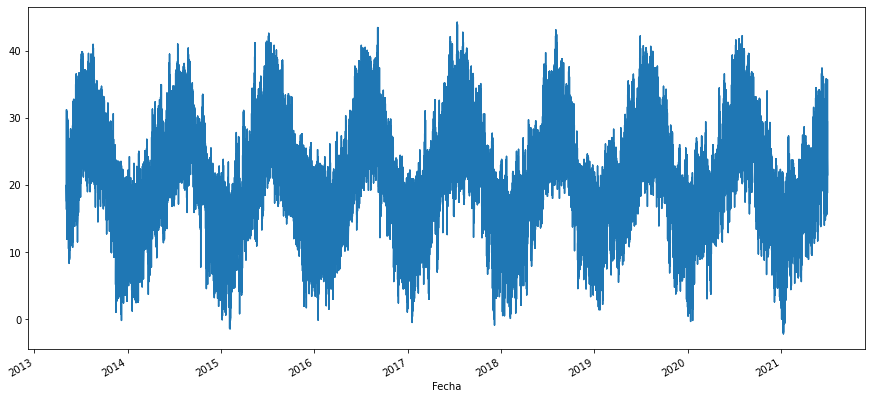

In [53]:
#Temperatures clearly look seasonal

fig, ax = plt.subplots(figsize=(15,7))

all_weather_stations["Tmax"].plot(ax=ax)

mdates.RRuleLocator("o")

Now let's add the population info to the weather DataFrame so I can do the weighted average by population

In [54]:
population_path = "/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Cifras oficiales de población resultantes de la revisión del Padrón municipal 2020.csv"
population = pd.read_csv(population_path, dtype = str, engine= "python", sep=";", encoding= "latin1")

In [55]:
population[["Code", "Provincia"]] = population.Provincias.str.split(" ",1, expand=True)
population

,Provincias,Sexo,Periodo,Total,Code,Provincia
0,02 Albacete,Total,2020,388.270,02,Albacete
1,03 Alicante/Alacant,Total,2020,1.879.888,03,Alicante/Alacant
2,04 Almería,Total,2020,727.945,04,Almería
3,01 Araba/Álava,Total,2020,333.940,01,Araba/Álava
4,33 Asturias,Total,2020,1.018.784,33,Asturias
5,05 Ávila,Total,2020,157.664,05,Ávila
6,06 Badajoz,Total,2020,672.137,06,Badajoz
7,"07 Balears, Illes",Total,2020,1.171.543,07,"Balears, Illes"
8,08 Barcelona,Total,2020,5.743.402,08,Barcelona
9,48 Bizkaia,Total,2020,1.159.443,48,Bizkaia


In [56]:
population = population.drop(["Provincias", "Sexo", "Periodo", "Code"], axis = 1)
population

,Total,Provincia
0,388.270,Albacete
1,1.879.888,Alicante/Alacant
2,727.945,Almería
3,333.940,Araba/Álava
4,1.018.784,Asturias
5,157.664,Ávila
6,672.137,Badajoz
7,1.171.543,"Balears, Illes"
8,5.743.402,Barcelona
9,1.159.443,Bizkaia


I need to check if all provinces name are the same between the population DataFrame and the weather DataFrame. If some names are different, I will rename them so both are the same in both DataFrames and I can easily work with them

In [57]:
population["Provincia"].unique()

array(['Albacete', 'Alicante/Alacant', 'Almería', 'Araba/Álava',
       'Asturias', 'Ávila', 'Badajoz', 'Balears, Illes', 'Barcelona',
       'Bizkaia', 'Burgos', 'Cáceres', 'Cádiz', 'Cantabria',
       'Castellón/Castelló', 'Ciudad Real', 'Córdoba', 'Coruña, A',
       'Cuenca', 'Gipuzkoa', 'Girona', 'Granada', 'Guadalajara', 'Huelva',
       'Huesca', 'Jaén', 'León', 'Lleida', 'Lugo', 'Madrid', 'Málaga',
       'Murcia', 'Navarra', 'Ourense', 'Palencia', 'Palmas, Las',
       'Pontevedra', 'Rioja, La', 'Salamanca', 'Santa Cruz de Tenerife',
       'Segovia', 'Sevilla', 'Soria', 'Tarragona', 'Teruel', 'Toledo',
       'Valencia/València', 'Valladolid', 'Zamora', 'Zaragoza', 'Ceuta',
       'Melilla'], dtype=object)

In [58]:
all_weather_stations["Provincia"].unique()

array(['A Coruña', 'Alacant/Alicante', 'Albacete', 'Almería',
       'Araba/Álava', 'Asturias', 'Badajoz', 'Barcelona', 'Bizkaia',
       'Burgos', 'Cantabria', 'Castelló/Castellón', 'Ceuta',
       'Ciudad Real', 'Cuenca', 'Cáceres', 'Cádiz', 'Córdoba', 'Gipuzkoa',
       'Girona', 'Granada', 'Guadalajara', 'Huelva', 'Huesca',
       'Illes Balears', 'Jaén', 'La Rioja', 'Las Palmas', 'León',
       'Lleida', 'Lugo', 'Madrid', 'Murcia', 'Málaga', 'Navarra',
       'Ourense', 'Palencia', 'Pontevedra', 'Salamanca',
       'Santa Cruz de Tenerife', 'Segovia', 'Sevilla', 'Soria',
       'Tarragona', 'Teruel', 'Toledo', 'Valladolid', 'València/Valencia',
       'Zamora', 'Zaragoza', 'Ávila', 'Melilla'], dtype=object)

In [59]:
provincias_weather = all_weather_stations["Provincia"]
provincias_weather = pd.DataFrame(provincias_weather)

In [60]:
#So there are 7 provinces that are called slighty different between the 2.

different_names = population.merge(right = provincias_weather, how= "left", indicator=True)

different_names = different_names[different_names['_merge']=='left_only']
different_names

,Total,Provincia,_merge
2959,1.879.888,Alicante/Alacant,left_only
17770,1.171.543,"Balears, Illes",left_only
35557,585.590,Castellón/Castelló,left_only
41488,1.121.815,"Coruña, A",left_only
91884,1.131.065,"Palmas, Las",left_only
94848,319.914,"Rioja, La",left_only
118564,2.591.875,Valencia/València,left_only


I'm going to change the name for all the 7 provinces, even if some of them won't be used in my models because they're not part of the Spanish peninsula. I'll get rid of those later.

In [61]:
#I'm changing the name in the population dataframe so it matches the weather stations one, for those that are not the same
population.loc[17, "Provincia"] = "A Coruña"
population.loc[1, "Provincia"] = "Alacant/Alicante"
population.loc[14, "Provincia"] = "Castelló/Castellón"
population.loc[37, "Provincia"] = "La Rioja"
population.loc[46, "Provincia"] = "València/Valencia"
population.loc[7, "Provincia"] = "Illes Balears"
population.loc[35, "Provincia"] = "Las Palmas"

In [62]:
#The reset index here is because otherwise I lose the Date when I do the merge (and I really don't want that...)

all_weather_stations.reset_index(inplace= True)
all_weather_stations_population = all_weather_stations.merge(right= population, on= "Provincia", how= "left")

In [63]:
all_weather_stations_population.rename(columns= {"Total": "Población"}, inplace=True)
all_weather_stations_population.head()

,Fecha,Provincia,Tmax,Tmin,Tmed,Vmax,TPrec,Población
0,2013-05-07,A Coruña,17.650000,12.950000,15.049999,35.0,9.6,1.121.815
1,2013-05-07,Alacant/Alicante,29.299999,17.400000,23.200001,18.5,0.0,1.879.888
2,2013-05-07,Albacete,25.450001,13.450001,19.750000,15.0,0.0,388.270
3,2013-05-07,Almería,24.250000,16.200001,20.950001,19.5,0.0,727.945
4,2013-05-07,Araba/Álava,21.100000,13.300000,17.200001,18.0,0.8,333.940


In [64]:
#Checking once more that there are no NaN values now
all_weather_stations_population.isnull().any()

Fecha        False
Provincia    False
Tmax         False
Tmin         False
Tmed         False
Vmax         False
TPrec        False
Población    False
dtype: bool

Before I do the weighted average by population so I get to 1 row by day, I need to remove all those Provinces that are not part of the Spanish peninsula (Balearic and Canary Islands, Ceuta and Melilla)

In [65]:
indexOut1 = all_weather_stations_population[(all_weather_stations_population["Provincia"] == "Ceuta")].index
indexOut2 = all_weather_stations_population[(all_weather_stations_population["Provincia"] == "Illes Balears")].index
indexOut3 = all_weather_stations_population[(all_weather_stations_population["Provincia"] == "Las Palmas")].index
indexOut4 = all_weather_stations_population[(all_weather_stations_population["Provincia"] == "Melilla")].index
indexOut5 = all_weather_stations_population[(all_weather_stations_population["Provincia"] == "Santa Cruz de Tenerife")].index

indexOut = indexOut1.append([indexOut2, indexOut3, indexOut4, indexOut5])

all_weather_stations_population.drop(indexOut, inplace= True)

In [66]:
all_weather_stations_population.head()

,Fecha,Provincia,Tmax,Tmin,Tmed,Vmax,TPrec,Población
0,2013-05-07,A Coruña,17.650000,12.950000,15.049999,35.0,9.6,1.121.815
1,2013-05-07,Alacant/Alicante,29.299999,17.400000,23.200001,18.5,0.0,1.879.888
2,2013-05-07,Albacete,25.450001,13.450001,19.750000,15.0,0.0,388.270
3,2013-05-07,Almería,24.250000,16.200001,20.950001,19.5,0.0,727.945
4,2013-05-07,Araba/Álava,21.100000,13.300000,17.200001,18.0,0.8,333.940


In [67]:
#In here I'm just checking that in fact all those provinces have been deleted
ce = all_weather_stations_population["Provincia"] == "Ceuta"
ba = all_weather_stations_population["Provincia"] == "Illes Balears"
pa = all_weather_stations_population["Provincia"] == "Las Palmas"
me =all_weather_stations_population["Provincia"] == "Melilla"
te = all_weather_stations_population["Provincia"] == "Santa Cruz de Tenerife"

print(np.count_nonzero(ce), np.count_nonzero(ba), np.count_nonzero(pa), np.count_nonzero(me), np.count_nonzero(te))


0 0 0 0 0


In [68]:
all_weather_stations_population.dtypes

Fecha        datetime64[ns]
Provincia            object
Tmax                float32
Tmin                float32
Tmed                float32
Vmax                float32
TPrec               float32
Población            object
dtype: object

In [69]:
all_weather_stations_population['Población'] = all_weather_stations_population['Población'].str.replace('.', '')

In [70]:
all_weather_stations_population["Población"] = pd.to_numeric(all_weather_stations_population["Población"], downcast="float")

To be able to do the weighted average by population, I'm going to use the following functions:

In [71]:
def grouped_weighted_avg_Tmax(values, weights, by):
    return pd.DataFrame((values * weights).groupby(by).sum() / weights.groupby(by).sum(), columns= ["Tmax"])

def grouped_weighted_avg_Tmin(values, weights, by):
    return pd.DataFrame((values * weights).groupby(by).sum() / weights.groupby(by).sum(), columns= ["Tmin"])

def grouped_weighted_avg_Tmed(values, weights, by):
    return pd.DataFrame((values * weights).groupby(by).sum() / weights.groupby(by).sum(), columns= ["Tmed"])

def grouped_weighted_avg_Vmax(values, weights, by):
    return pd.DataFrame((values * weights).groupby(by).sum() / weights.groupby(by).sum(), columns= ["Vmax"])

def grouped_weighted_avg_Tprec(values, weights, by):
    return pd.DataFrame((values * weights).groupby(by).sum() / weights.groupby(by).sum(), columns= ["TPrec"])

In [72]:
weighted_av_Tmax = grouped_weighted_avg_Tmax(values= all_weather_stations_population["Tmax"],
                                 weights= all_weather_stations_population["Población"],
                                 by= all_weather_stations_population["Fecha"])
weighted_av_Tmin = grouped_weighted_avg_Tmin(values= all_weather_stations_population["Tmin"],
                                 weights= all_weather_stations_population["Población"],
                                 by= all_weather_stations_population["Fecha"])
weighted_av_Tmed = grouped_weighted_avg_Tmed(values= all_weather_stations_population["Tmed"],
                                 weights= all_weather_stations_population["Población"],
                                 by= all_weather_stations_population["Fecha"])
weighted_av_Vmax = grouped_weighted_avg_Vmax(values= all_weather_stations_population["Vmax"],
                                 weights= all_weather_stations_population["Población"],
                                 by= all_weather_stations_population["Fecha"])
weighted_av_Tprec = grouped_weighted_avg_Tprec(values= all_weather_stations_population["TPrec"],
                                 weights= all_weather_stations_population["Población"],
                                 by= all_weather_stations_population["Fecha"])


In [73]:
weather_variables_list = [weighted_av_Tmax, weighted_av_Tmin, weighted_av_Tmed,
                          weighted_av_Vmax, weighted_av_Tprec]

weather_variables = weather_variables_list[0].join(weather_variables_list[1:])
weather_variables.head()

,Tmax,Tmin,Tmed,Vmax,TPrec
Fecha,,,,,
2013-05-07,24.372623,13.598554,19.108723,17.469931,0.548212
2013-05-08,24.171618,13.924416,19.068588,16.027378,0.335008
2013-05-09,23.007523,13.323574,18.142879,17.443392,2.003548
2013-05-10,22.321642,12.264773,17.353886,17.460852,0.044821
2013-05-11,21.945469,10.597996,16.243876,17.480986,0.000000


In [74]:
weather_variables.rename_axis("Date", axis= "index", inplace=True)
weather_variables.head()

,Tmax,Tmin,Tmed,Vmax,TPrec
Date,,,,,
2013-05-07,24.372623,13.598554,19.108723,17.469931,0.548212
2013-05-08,24.171618,13.924416,19.068588,16.027378,0.335008
2013-05-09,23.007523,13.323574,18.142879,17.443392,2.003548
2013-05-10,22.321642,12.264773,17.353886,17.460852,0.044821
2013-05-11,21.945469,10.597996,16.243876,17.480986,0.000000


### Combining weather data to electricity and Brent prices dataframe
Now, let's add all the weather variables to the dataframe with the electricity and Brent prices

In [75]:
electricity_brent.set_index("Date", inplace=True)

In [76]:
electricity_brent.drop("Periodo", inplace= True, axis= 1)

In [77]:
electricity_brent.columns

Index(['Energía\n final \nMWh', 'Mercado \ndiario \n€/MWh',
       'Mercado \nintradiario \n€/MWh', 'Restricciones\n€/MWh',
       'Procesos \nOS \n€/MWh', 'Garantía potencia \nPagos capacidad\n€/MWh',
       'Total\n€/MWh', 'Coste\ns.interrrumpibilidad', 'Day', 'Último',
       'Apertura', 'Máximo', 'Mínimo', 'Vol.'],
      dtype='object')

Let's rename the columns so they make more sense

In [78]:
electricity_brent.rename(columns= {"Energía\n final \nMWh": "Energía final MWh", 
                                  "Mercado \ndiario \n€/MWh": "Mercado diario €/MWh",
                                 "Mercado \nintradiario \n€/MWh": "Mercado intradiario €/MWh",
                                 "Restricciones\n€/MWh": "Restricciones €/MWh",
                                 "Procesos \nOS \n€/MWh": "Procesos OS €/MWh",
                                 "Garantía potencia \nPagos capacidad\n€/MWh": "Garantía potencia Pagos capacidad €/MWh",
                                 "Total\n€/MWh": "Total €/MWh", "Coste\ns.interrrumpibilidad":"Coste s.interrrumpibilidad",
                                   "Último": "Precio cierre Brent", 
                                   "Apertura": "Precio apertura Brent","Máximo": "Precio Máximo Brent",
                                   "Mínimo": "Precio mínimo Brent", "Vol.": "N. de operaciones del día"}, 
                         inplace=True)

In [79]:
electricity_brent.head()

,Energía final MWh,Mercado diario €/MWh,Mercado intradiario €/MWh,Restricciones €/MWh,Procesos OS €/MWh,Garantía potencia Pagos capacidad €/MWh,Total €/MWh,Coste s.interrrumpibilidad,Day,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,N. de operaciones del día
Date,,,,,,,,,,,,,,
2013-06-03,700500.79,38.51,-0.16,5.44,1.94,5.45,51.18,NaN,Lunes,"102,06","100,15","102,48","99,66","255,71K"
2013-06-04,702582.423,47.12,0.01,3.16,1.25,5.42,56.96,NaN,Martes,"103,24","102,02","103,58","101,47","300,89K"
2013-06-05,701818.743,51.48,-0.16,2.6,0.97,5.45,60.35,NaN,Miércoles,"103,04","103,48","104,07","102,85","202,95K"
2013-06-06,700746.514,49.47,-0.32,2.35,0.67,5.44,57.6,NaN,Jueves,"103,61","102,94","103,95","102,81","173,41K"
2013-06-07,688082.805,49.33,-0.16,2.24,0.99,5.42,57.82,NaN,Viernes,"104,56","103,65","105,01","102,89","234,18K"


In [80]:
electricity_brent_weather = electricity_brent.merge(weather_variables, on = "Date")
electricity_brent_weather

,Energía final MWh,Mercado diario €/MWh,Mercado intradiario €/MWh,Restricciones €/MWh,Procesos OS €/MWh,Garantía potencia Pagos capacidad €/MWh,Total €/MWh,Coste s.interrrumpibilidad,Day,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,N. de operaciones del día,Tmax,Tmin,Tmed,Vmax,TPrec
Date,,,,,,,,,,,,,,,,,,,
2013-06-03,700500.79,38.51,-0.16,5.44,1.94,5.45,51.18,NaN,Lunes,"102,06","100,15","102,48","99,66","255,71K",24.673298,9.800121,17.411293,17.170864,0.000000
2013-06-04,702582.423,47.12,0.01,3.16,1.25,5.42,56.96,NaN,Martes,"103,24","102,02","103,58","101,47","300,89K",25.979870,10.501701,18.384163,17.234720,0.007118
2013-06-05,701818.743,51.48,-0.16,2.6,0.97,5.45,60.35,NaN,Miércoles,"103,04","103,48","104,07","102,85","202,95K",25.768139,12.123443,19.021616,19.147642,0.053441
2013-06-06,700746.514,49.47,-0.32,2.35,0.67,5.44,57.6,NaN,Jueves,"103,61","102,94","103,95","102,81","173,41K",23.760830,12.517649,18.125957,20.303318,0.745070
2013-06-07,688082.805,49.33,-0.16,2.24,0.99,5.42,57.82,NaN,Viernes,"104,56","103,65","105,01","102,89","234,18K",21.150854,11.924727,16.672276,20.615791,1.826179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-27,822863.04,39.87,-0.03,1.15,0.21,3.23,44.46,0.03,Lunes,"59,32","60,23","60,49","58,50","259,77K",12.427604,3.589538,8.053116,20.110352,1.507235
2020-01-28,816667.2,39.02,-0.02,1.36,0.24,3.2,43.83,0.03,Martes,"59,51","59,03","60,12","58,50","248,95K",14.772270,7.194873,10.979397,18.389824,0.385379
2020-01-29,818153.969,40.24,-0.02,1.38,0.3,3.12,45.06,0.03,Miércoles,"59,81","59,86","60,62","59,26","142,68K",15.774078,7.631106,11.899413,14.971382,2.780003


In [81]:
electricity_brent_weather.dtypes

Energía final MWh                           object
Mercado diario €/MWh                        object
Mercado intradiario €/MWh                   object
Restricciones €/MWh                         object
Procesos OS €/MWh                           object
Garantía potencia Pagos capacidad €/MWh     object
Total €/MWh                                 object
Coste s.interrrumpibilidad                  object
Day                                         object
Precio cierre Brent                         object
Precio apertura Brent                       object
Precio Máximo Brent                         object
Precio mínimo Brent                         object
N. de operaciones del día                   object
Tmax                                       float32
Tmin                                       float32
Tmed                                       float32
Vmax                                       float32
TPrec                                      float32
dtype: object

Let's replace dots and commas accordingly in the dataframe. Dots should be used for decimals separators, and commas as thousands separators. Also, let's convert all numerics values to numeric type.
I'm also going to delete the column referring to the number of contracts sold that day in the Brent oil future market as I don't think this is relevant

In [82]:
electricity_brent_weather['Precio cierre Brent'] = electricity_brent_weather["Precio cierre Brent"].str.replace(",", ".")
electricity_brent_weather['Precio apertura Brent'] = electricity_brent_weather["Precio apertura Brent"].str.replace(",", ".")
electricity_brent_weather['Precio Máximo Brent'] = electricity_brent_weather["Precio Máximo Brent"].str.replace(",", ".")
electricity_brent_weather['Precio mínimo Brent'] = electricity_brent_weather["Precio mínimo Brent"].str.replace(",", ".")

In [83]:
electricity_brent_weather["Energía final MWh"] = pd.to_numeric(electricity_brent_weather["Energía final MWh"], downcast="float")
electricity_brent_weather["Mercado diario €/MWh"] = pd.to_numeric(electricity_brent_weather["Mercado diario €/MWh"], downcast="float")
electricity_brent_weather["Mercado intradiario €/MWh"] = pd.to_numeric(electricity_brent_weather["Mercado intradiario €/MWh"], downcast="float")
electricity_brent_weather["Restricciones €/MWh"] = pd.to_numeric(electricity_brent_weather["Restricciones €/MWh"], downcast="float")
electricity_brent_weather["Procesos OS €/MWh"] = pd.to_numeric(electricity_brent_weather["Procesos OS €/MWh"], downcast="float")
electricity_brent_weather["Garantía potencia Pagos capacidad €/MWh"] = pd.to_numeric(electricity_brent_weather["Garantía potencia Pagos capacidad €/MWh"], downcast="float")
electricity_brent_weather["Total €/MWh"] = pd.to_numeric(electricity_brent_weather["Total €/MWh"], downcast="float")
electricity_brent_weather["Coste s.interrrumpibilidad"] = pd.to_numeric(electricity_brent_weather["Coste s.interrrumpibilidad"], downcast="float")
electricity_brent_weather["Precio cierre Brent"] = pd.to_numeric(electricity_brent_weather["Precio cierre Brent"], downcast="float")
electricity_brent_weather["Precio apertura Brent"] = pd.to_numeric(electricity_brent_weather["Precio apertura Brent"], downcast="float")
electricity_brent_weather["Precio Máximo Brent"] = pd.to_numeric(electricity_brent_weather["Precio Máximo Brent"], downcast="float")
electricity_brent_weather["Precio mínimo Brent"] = pd.to_numeric(electricity_brent_weather["Precio mínimo Brent"], downcast="float")

In [84]:
electricity_brent_weather.drop(columns="N. de operaciones del día", inplace= True)

The variable "Coste s.interrrumpibilidad" is only there from February 2014. Therefore, let's replace the NaN values in that column with 0 for the period before February 2014

In [85]:
electricity_brent_weather.isnull().any()

Energía final MWh                          False
Mercado diario €/MWh                       False
Mercado intradiario €/MWh                  False
Restricciones €/MWh                        False
Procesos OS €/MWh                          False
Garantía potencia Pagos capacidad €/MWh    False
Total €/MWh                                False
Coste s.interrrumpibilidad                  True
Day                                        False
Precio cierre Brent                        False
Precio apertura Brent                      False
Precio Máximo Brent                        False
Precio mínimo Brent                        False
Tmax                                       False
Tmin                                       False
Tmed                                       False
Vmax                                       False
TPrec                                      False
dtype: bool

In [86]:
electricity_brent_weather.fillna(0, inplace= True)
electricity_brent_weather.isnull().any()

Energía final MWh                          False
Mercado diario €/MWh                       False
Mercado intradiario €/MWh                  False
Restricciones €/MWh                        False
Procesos OS €/MWh                          False
Garantía potencia Pagos capacidad €/MWh    False
Total €/MWh                                False
Coste s.interrrumpibilidad                 False
Day                                        False
Precio cierre Brent                        False
Precio apertura Brent                      False
Precio Máximo Brent                        False
Precio mínimo Brent                        False
Tmax                                       False
Tmin                                       False
Tmed                                       False
Vmax                                       False
TPrec                                      False
dtype: bool

In [87]:
electricity_brent_weather.describe()

,Energía final MWh,Mercado diario €/MWh,Mercado intradiario €/MWh,Restricciones €/MWh,Procesos OS €/MWh,Garantía potencia Pagos capacidad €/MWh,Total €/MWh,Coste s.interrrumpibilidad,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
count,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000
mean,726284.937500,46.979504,-0.039206,2.064229,0.919504,3.368509,54.253700,0.960992,65.658798,65.668953,66.488586,64.793839,21.548716,10.296162,15.981436,18.154850,1.308443
std,65468.472656,13.825276,0.113314,1.253099,0.741643,1.579078,13.798329,0.795205,23.072765,23.036779,22.989422,23.087326,6.946665,5.559977,6.172229,4.133570,2.287739
min,549004.000000,0.550000,-1.200000,0.090000,0.000000,1.450000,6.360000,0.000000,19.330000,19.900000,21.290001,15.980000,6.146241,-3.613261,1.278752,9.203861,0.000000
25%,684016.687500,39.669998,-0.070000,1.140000,0.410000,2.260000,46.560001,0.000000,49.029999,49.110001,49.799999,48.209999,15.294067,5.531762,10.473571,15.608832,0.013913
50%,726161.125000,48.169998,-0.020000,1.850000,0.700000,2.670000,55.360001,1.000000,60.529999,60.750000,61.790001,59.610001,21.367491,10.105659,15.716086,17.623846,0.317259
75%,772514.312500,56.105000,0.010000,2.720000,1.190000,4.170000,63.670000,1.780000,74.920002,74.730003,75.785000,73.910000,27.544918,15.270383,21.462419,19.970531,1.580784
max,927416.187500,93.919998,0.510000,10.160000,8.010000,7.820000,103.209999,2.210000,116.610001,115.930000,117.339996,115.019997,36.400291,21.160681,28.862202,39.631035,21.939543


### Let's do some visualisations before I start using some models

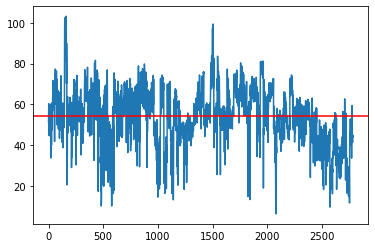

In [88]:
#At first sight, it doesn't look to me that the energy prices depend on seasonality, but I'll investigate this later

media = electricity_brent_weather["Total €/MWh"].mean()

plt.plot(electricity_brent_weather["Total €/MWh"].values)
plt.axhline(y = media,color ='r', linestyle = '-')
plt.show()

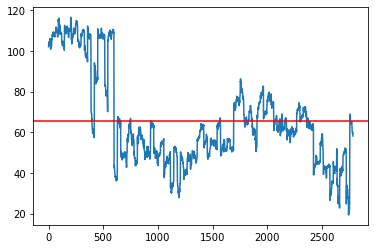

In [89]:
#Compared to the electricity prices,the Brent oil future prices look much less dependant on seasonality

media = electricity_brent_weather["Precio cierre Brent"].mean()

plt.plot(electricity_brent_weather["Precio cierre Brent"].values)
plt.axhline(y = media,color ='r', linestyle = '-')
plt.show()

In [90]:
months = electricity_brent_weather.resample("M").mean()
months

,Energía final MWh,Mercado diario €/MWh,Mercado intradiario €/MWh,Restricciones €/MWh,Procesos OS €/MWh,Garantía potencia Pagos capacidad €/MWh,Total €/MWh,Coste s.interrrumpibilidad,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
Date,,,,,,,,,,,,,,,,,
2013-05-31,680088.6250,43.075600,-0.195200,3.443600,1.200000,4.943200,52.467602,0.0,103.411598,103.517998,104.028801,102.283203,20.059738,9.461501,14.843591,20.259188,1.413655
2013-06-30,694027.0625,42.568928,-0.222857,2.901429,1.466786,5.719643,52.433212,0.0,103.355003,103.243927,104.275002,102.317856,25.993834,13.237323,19.710827,18.583956,0.745985
2013-07-31,757750.8750,51.859032,-0.037419,1.263871,1.267097,6.573548,60.928066,0.0,107.559998,107.169357,108.048706,106.428711,31.171972,17.577093,24.457556,18.039492,0.254679
2013-08-31,705887.1250,48.723225,-0.073548,2.016452,1.386452,4.474839,56.526131,0.0,110.358391,109.903221,111.000000,109.267738,30.553507,17.467529,24.083385,17.851673,0.319438
2013-09-30,713595.0625,51.093334,-0.072333,2.319000,1.423333,4.957000,59.721001,0.0,111.513336,111.502335,112.328667,110.504333,27.135378,15.221637,21.295116,17.077494,0.731561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,738332.6875,36.452579,-0.001935,1.580968,0.330968,1.922581,40.285484,0.0,45.090321,45.215485,45.604515,44.554195,31.063057,17.644073,24.404476,18.251814,0.653450
2020-09-30,715004.3125,42.311001,-0.014333,1.739667,0.356000,2.131667,46.523666,0.0,41.877998,42.077000,42.662666,41.251667,27.048923,14.647007,20.938395,17.335526,0.950422
2020-10-31,694828.5625,36.901611,-0.033226,2.141936,0.459032,2.031935,41.501289,0.0,41.439678,41.678387,42.201614,40.735161,20.802197,9.428974,15.177327,18.228868,1.878773


In [91]:
months.describe()

,Energía final MWh,Mercado diario €/MWh,Mercado intradiario €/MWh,Restricciones €/MWh,Procesos OS €/MWh,Garantía potencia Pagos capacidad €/MWh,Total €/MWh,Coste s.interrrumpibilidad,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,726303.312500,46.897961,-0.039743,2.070693,0.921931,3.375674,54.183868,0.957191,65.772285,65.782791,66.603165,64.905998,21.507051,10.264194,15.944671,18.173595,1.312593
std,40405.843750,11.473991,0.050458,1.020913,0.616351,1.444641,11.561060,0.799834,23.120914,23.081236,23.038614,23.133762,6.505588,5.219283,5.857212,2.009020,0.864627
min,610884.625000,17.713333,-0.310968,0.513226,0.241935,1.922581,24.261333,0.000000,27.365334,27.713333,29.641666,25.717667,11.808302,1.768613,6.919828,13.237708,0.169755
25%,695817.828125,42.141719,-0.048565,1.160726,0.454274,2.238917,47.390638,0.000000,49.204894,49.354140,50.133759,48.381038,15.525868,5.585818,10.782392,17.166286,0.586456
50%,723264.187500,48.099678,-0.026070,2.026392,0.768559,2.817419,55.816000,1.001452,60.518064,60.221737,61.443001,59.390097,21.021845,10.066199,15.726924,18.213499,1.216838
75%,754270.437500,53.656770,-0.012000,2.755242,1.152097,4.726146,61.471292,1.770217,75.266424,75.356714,76.169289,74.368408,27.139271,14.922043,21.115708,19.205523,1.823197
max,818443.625000,72.460327,0.030645,5.480000,2.890000,6.744839,79.733223,2.109000,112.042000,112.026001,112.713333,111.419998,32.668228,19.156334,25.957901,25.483311,3.975250


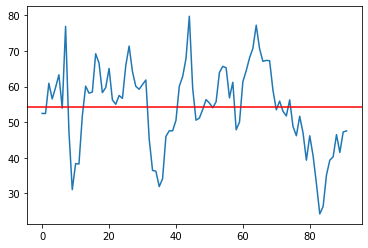

In [92]:
media = months["Total €/MWh"].mean()
plt.plot(months["Total €/MWh"].values)
plt.axhline(y = media, color ='r', linestyle = '-')

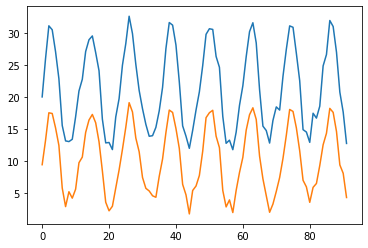

In [93]:
plt.plot(months["Tmax"].values)
plt.plot(months["Tmin"].values)

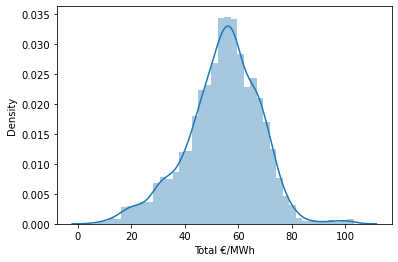

In [94]:
#It looks like the energy prices follow a normal distribution
sns.distplot(electricity_brent_weather["Total €/MWh"]);

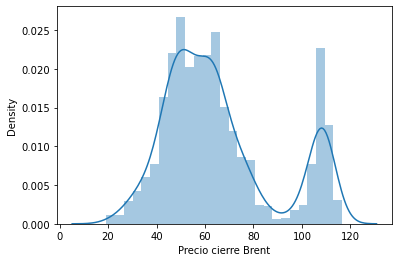

In [95]:
#It looks as if the Brent oil future prices followed 2 different distributions
sns.distplot(electricity_brent_weather["Precio cierre Brent"]);

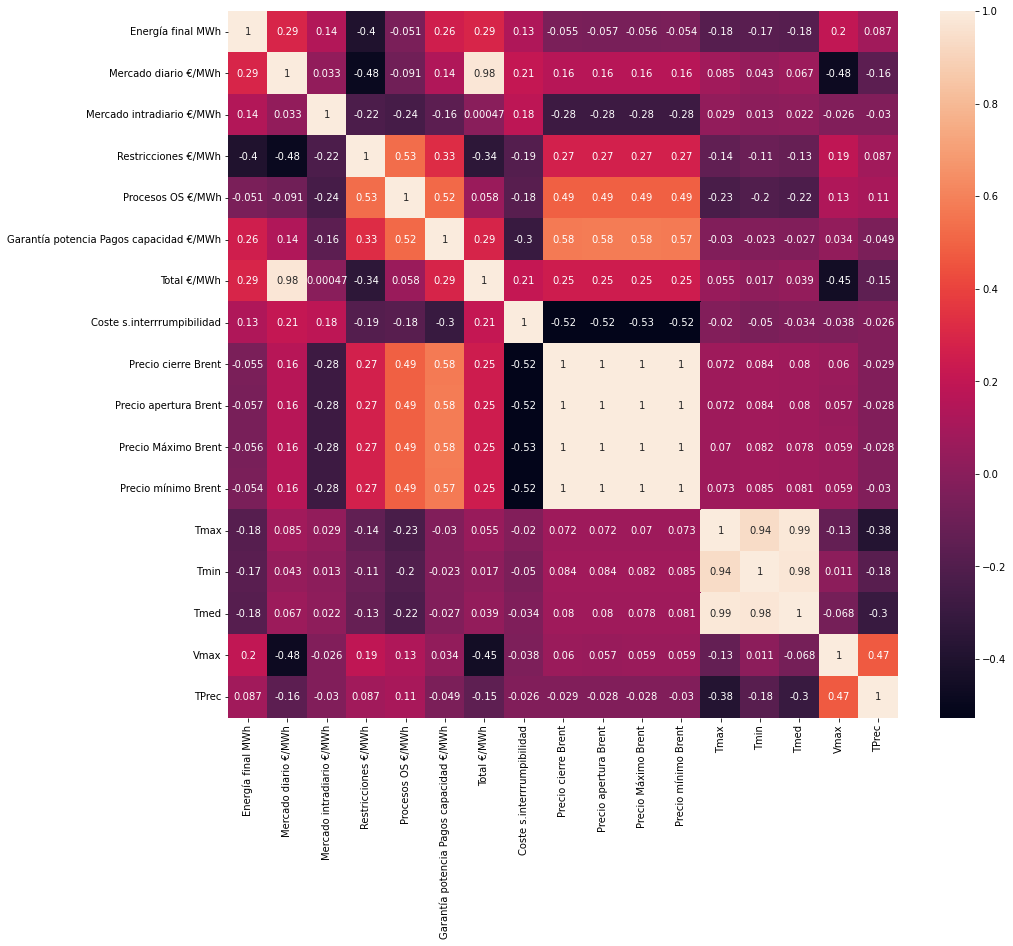

In [96]:
#In here we can see how all the variables are correlated
sns.heatmap(electricity_brent_weather.corr(), annot=True)
plt.gcf().set_size_inches(15,13)

Looking at the correlations, we can see that the Total electricity price is very strongly correlated with the price of "Mercado diario". This makes sense as both prices are practically the same, the only difference being that the Total one is adjusted by the price of "Mercado intradiario", "Restricciones", "Procesos OS", "Garantía potencia de pagos capacidad" and "Coste s. interrumpibilidad". It would make sense to not use all these variables when modelling, as they will lead to over-fitting.

The other variable that seem to be very correlated with the Total electricity price is the wind (Vmax), although both variables have a negative correlation. This means that when the gust of winds are stronger in a day, the electricity price goes down.

I'm going to save the electricity_brent_weather DataFrame in a csv, so I can open it in another notebook if necessary. 

In [97]:
electricity_brent_weather.to_csv("electricity_brent_weather1320.csv", sep= ";", index = True)